<a href="https://colab.research.google.com/github/SimeonHristov99/ML_21-22/blob/main/Week_09_Precision_vs_Recall%2C_F1%2C_Log_loss%2C_Boosting_(XGBoost%2C_Adaboost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Challenge
 - Data: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
 - Type of problem: Classification
 - Goal: Predict whether a customer will churn.



## Imports and Constants

In [ ]:
from itertools import product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef

In [ ]:
DATA_PATH = 'https://raw.githubusercontent.com/SimeonHristov99/ML_21-22/main/Week_08%20-%20Decision%20Trees.%20Random%20Forests.%20Bagging%20%26%20Boosting/WA_Fn-UseC_-Telco-Customer-Churn.csv'
FIG_SIZE = (12, 10)

plt.rc('figure', figsize=FIG_SIZE)
pd.set_option('max_columns', None)

## Get the data

In [ ]:
df = pd.read_csv(DATA_PATH)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Exploratory Data Analysis

Check the types of the columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are a lot of object columns and a few numeric columns.

See the statistics for the numeric features.

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- The numeric features do not seem to be very skewed.
- The `SeniorCitizen` column has very low variance. Also, the min and max are 0 and 1 which suggest it might actually be a categorical feature.

See the statistics for the non-numeric features.

In [ ]:
df.describe(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


- The `customerID` column is a unique identifier which we can ignore.
- The cardinality of most of the object columns is low.
- Half of the customers are male, have a fiber optic connection, have a month-to-month contract.
- We have an imbalanced dataset. Most of the customers do not churn.

In [ ]:
df.isna().mean()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

There are no missing values.

Check the distribution of the target variable.

In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

We have an imbalanced dataset. Most of the customers do not churn.

See the unique values.

In [ ]:
for col in df:
  unq_vals = df[col].unique()
  num_unq_vals = len(unq_vals)
  
  if num_unq_vals < 12:
    print(f'Unique {col:17} | {df[col].dtype} | {num_unq_vals:5} | {unq_vals}')
  else:
    print(f'Unique {col:17} | {df[col].dtype} | {num_unq_vals:5} |')

Unique customerID        | object |  7043 |
Unique gender            | object |     2 | ['Female' 'Male']
Unique SeniorCitizen     | int64 |     2 | [0 1]
Unique Partner           | object |     2 | ['Yes' 'No']
Unique Dependents        | object |     2 | ['No' 'Yes']
Unique tenure            | int64 |    73 |
Unique PhoneService      | object |     2 | ['No' 'Yes']
Unique MultipleLines     | object |     3 | ['No phone service' 'No' 'Yes']
Unique InternetService   | object |     3 | ['DSL' 'Fiber optic' 'No']
Unique OnlineSecurity    | object |     3 | ['No' 'Yes' 'No internet service']
Unique OnlineBackup      | object |     3 | ['Yes' 'No' 'No internet service']
Unique DeviceProtection  | object |     3 | ['No' 'Yes' 'No internet service']
Unique TechSupport       | object |     3 | ['No' 'Yes' 'No internet service']
Unique StreamingTV       | object |     3 | ['No' 'Yes' 'No internet service']
Unique StreamingMovies   | object |     3 | ['No' 'Yes' 'No internet service']
Unique Con

- `tenure` has relatively low cardinality given that it's a numeric feature. According to the description, tenure is the number of months the customer has stayed with the company.
- The `SeniorCitizen` column should be regarded as a categorical feature.
- The `Contract` column could be regarded as an ordinal feature.
- The `TotalCharges` column has be regarded as a numeric feature.

Figure out why the `TotalCharges` column is not numeric.

In [ ]:
# df['TotalCharges'].astype(float)

In [ ]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We'll consider those entries as missing a value for the `TotalCharges` column. Figure out the distribution of the column.

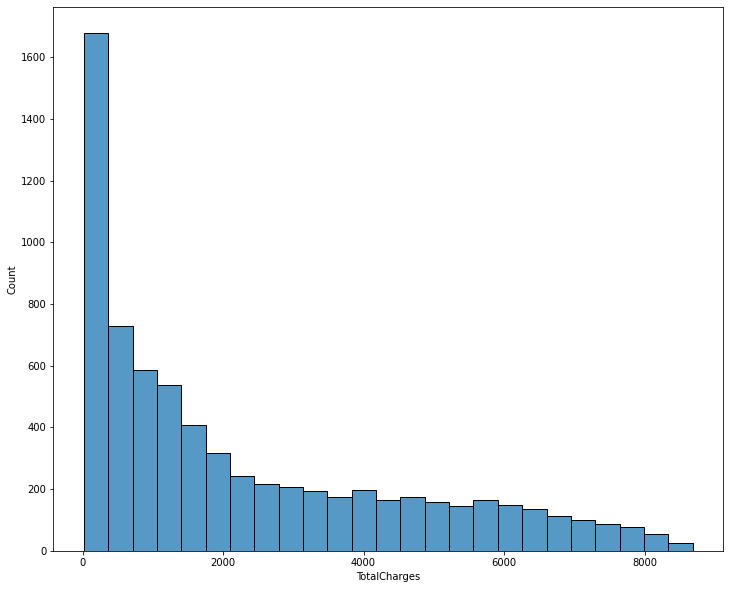

In [ ]:
ax = sns.histplot(df.loc[df['TotalCharges'] != ' ', 'TotalCharges'].astype(float))

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We see a right skew.

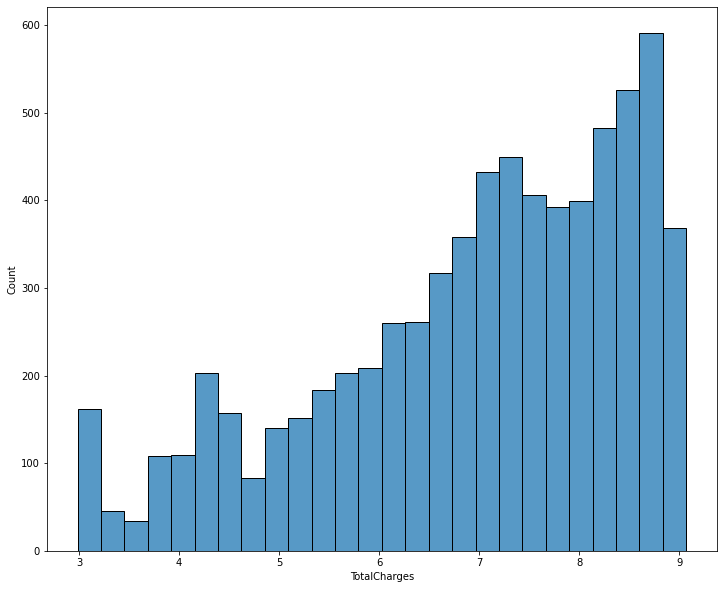

In [ ]:
ax = sns.histplot(np.log1p(df.loc[df['TotalCharges'] != ' ', 'TotalCharges'].astype(float)))

Because the log transform did not have a meaningful effect, this feature is ok as it is. We'll replace the missing values with the mode.

In [ ]:
tmp_total_charges = df.loc[df['TotalCharges'] != ' ', 'TotalCharges'].astype(float)
tmp_total_charges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [ ]:
tmp_total_charges = df['TotalCharges'].replace(' ', np.NaN).fillna(tmp_total_charges.mode()).astype(float)
tmp_total_charges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

Show relationships between numeric features and the target column.

Create a table of the proper numeric features.

In [ ]:
tmp_numeric_feats = pd.concat([df.select_dtypes('number').drop(['SeniorCitizen'], axis=1), tmp_total_charges, df['Churn']], axis=1)
tmp_numeric_feats

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,No
1,34,56.95,1889.50,No
2,2,53.85,108.15,Yes
3,45,42.30,1840.75,No
4,2,70.70,151.65,Yes
...,...,...,...,...
7038,24,84.80,1990.50,No
7039,72,103.20,7362.90,No
7040,11,29.60,346.45,No
7041,4,74.40,306.60,Yes


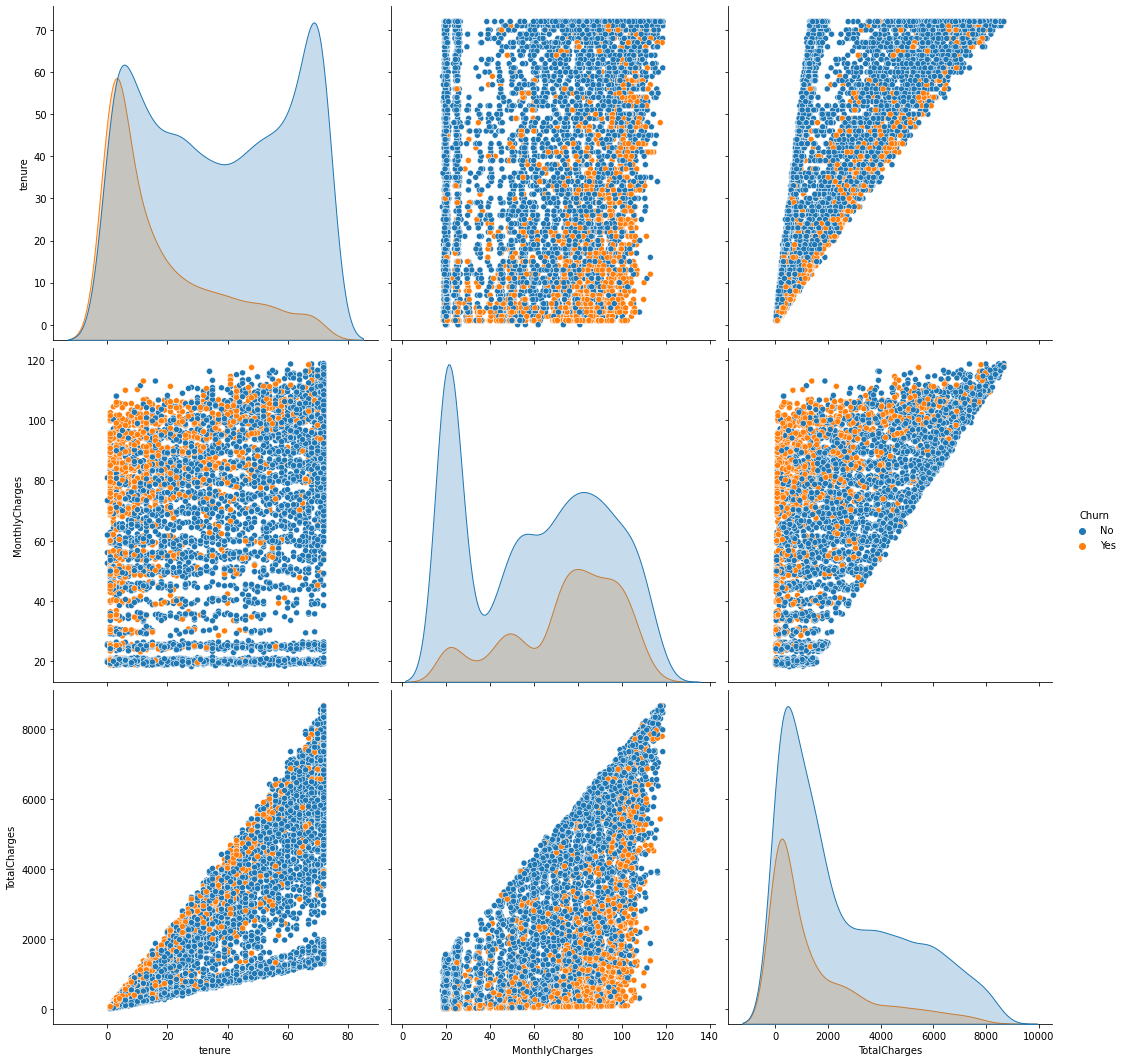

In [ ]:
ax = sns.pairplot(tmp_numeric_feats, hue='Churn', height=5)

- `tenure` has a bimodal distribution
- the longer a customer has stayed with the company the less likely they are to churn
- for monthly charges below 40 there is little change that the customer will churn
- the customers who churn generally have low `TotalCharges` but have high `MonthlyCharges`
- customers who have been for long with the company and pay low `TotalCharges` almost never churn

Show relationships between categorical features and the target column.

In [ ]:
cat_features = df.select_dtypes('object').columns.drop(['customerID', 'TotalCharges', 'Churn'])
cat_features

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

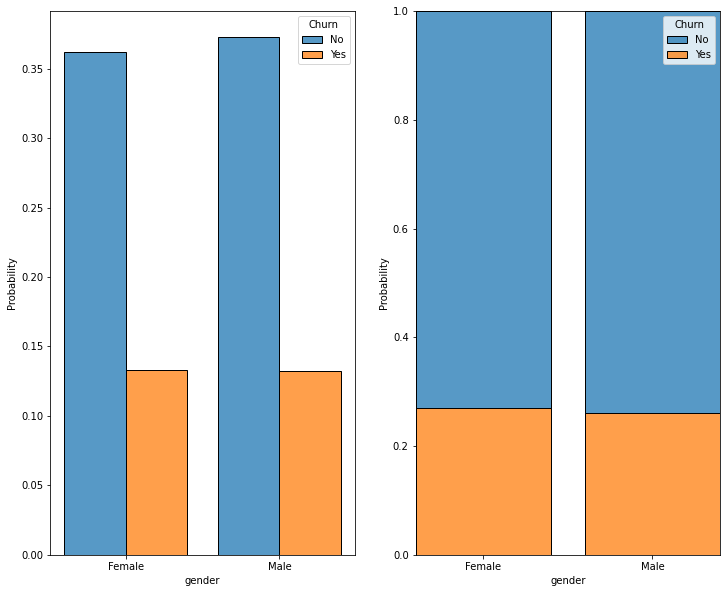

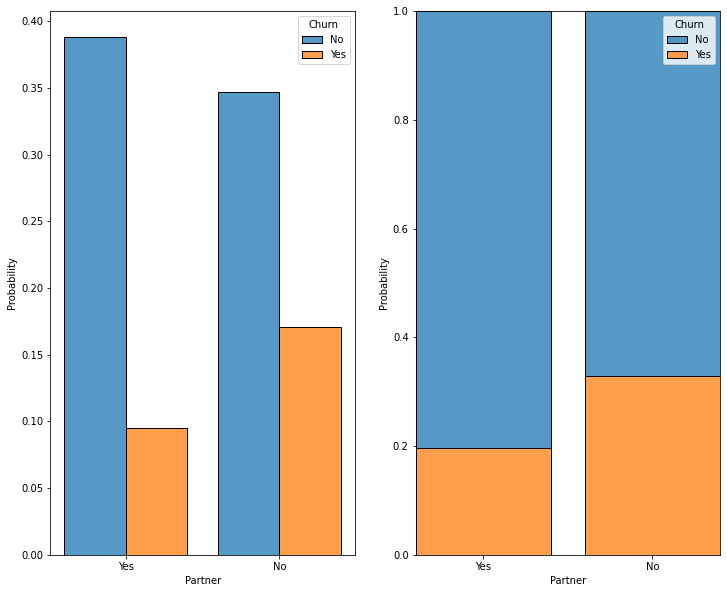

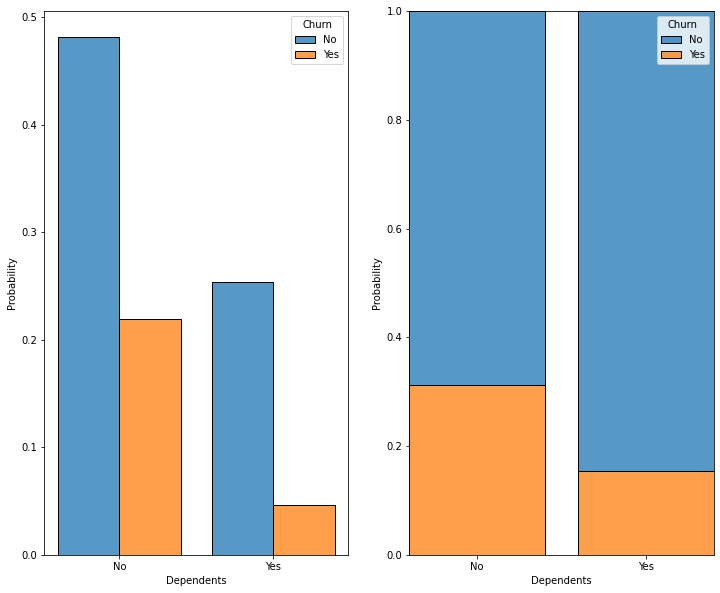

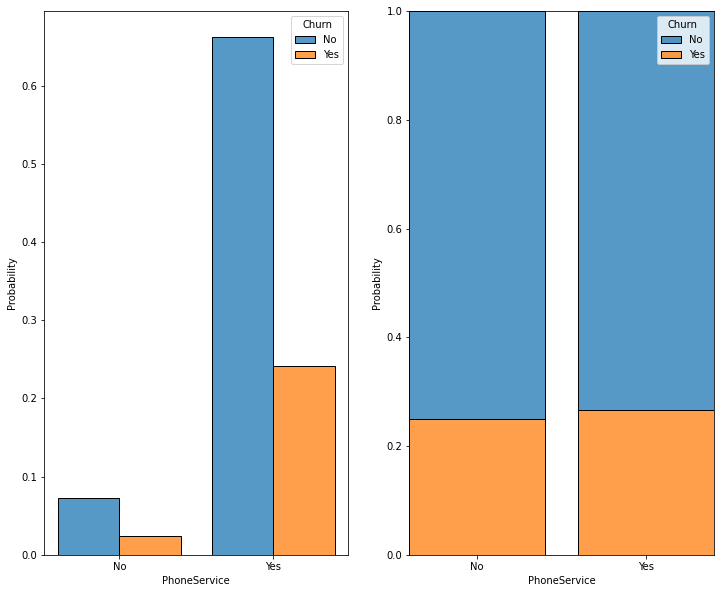

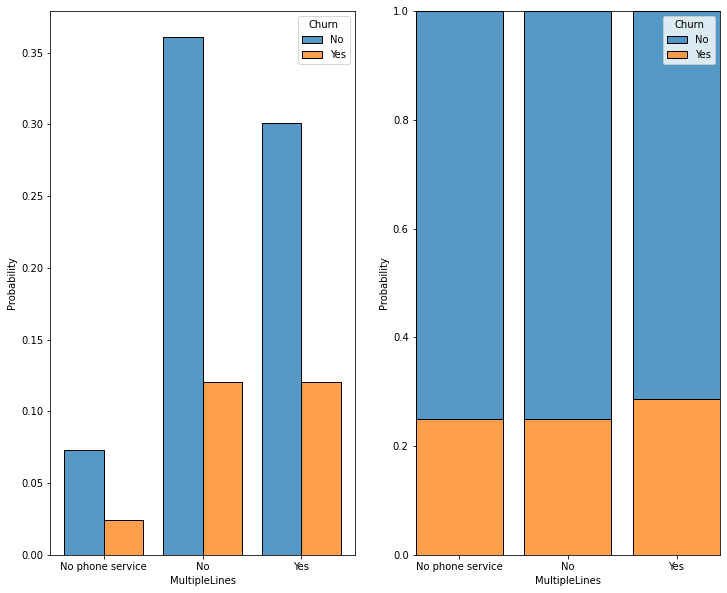

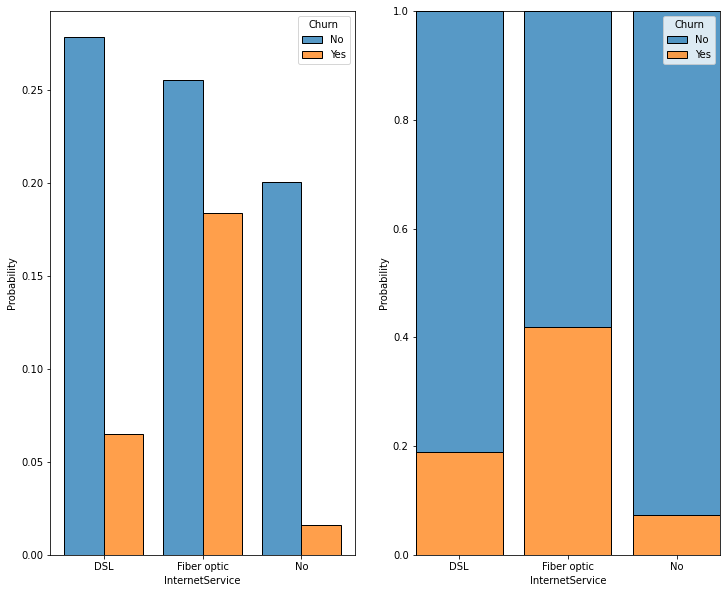

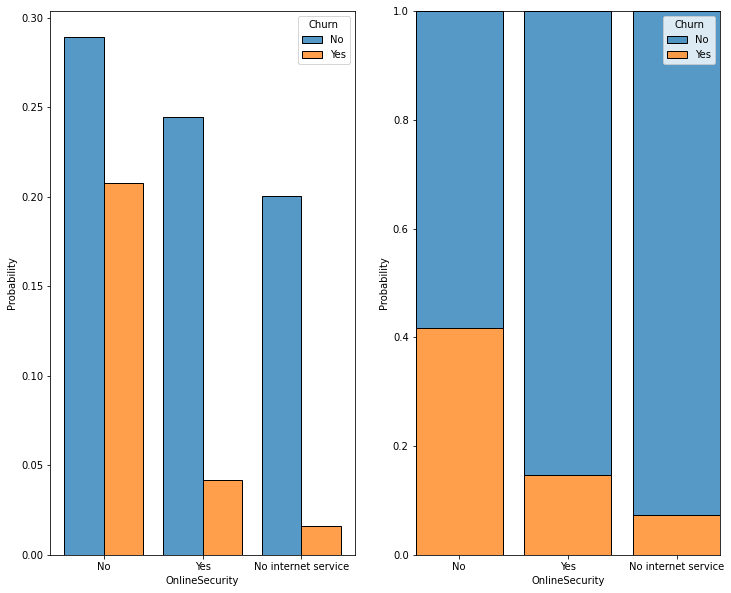

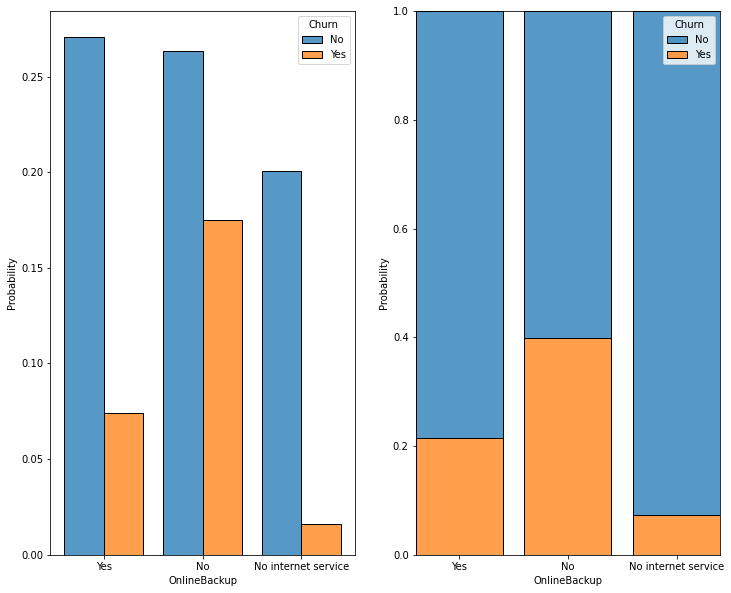

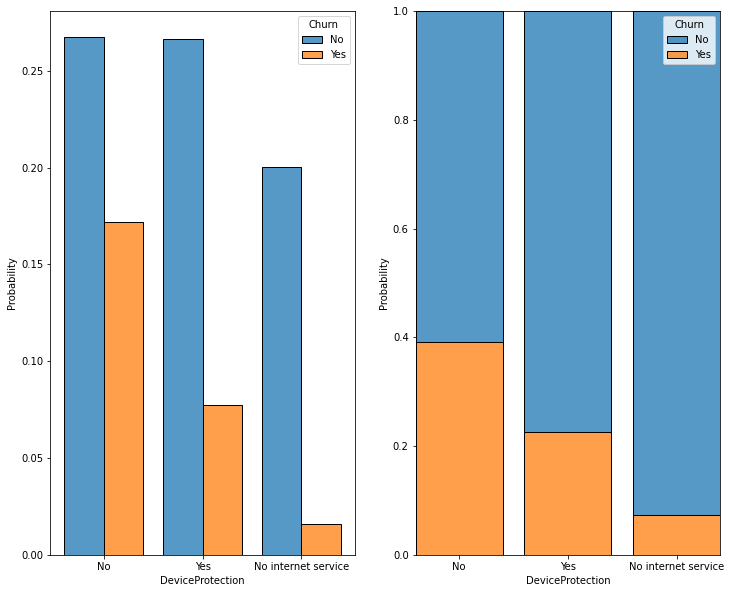

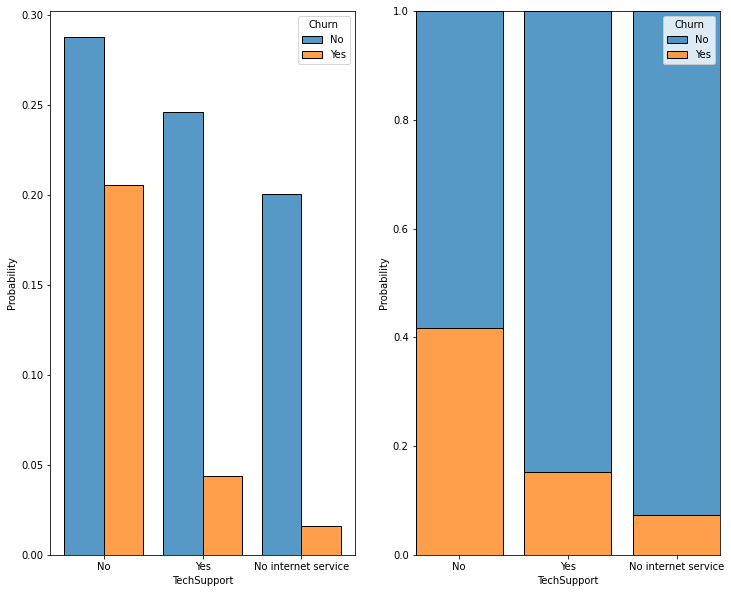

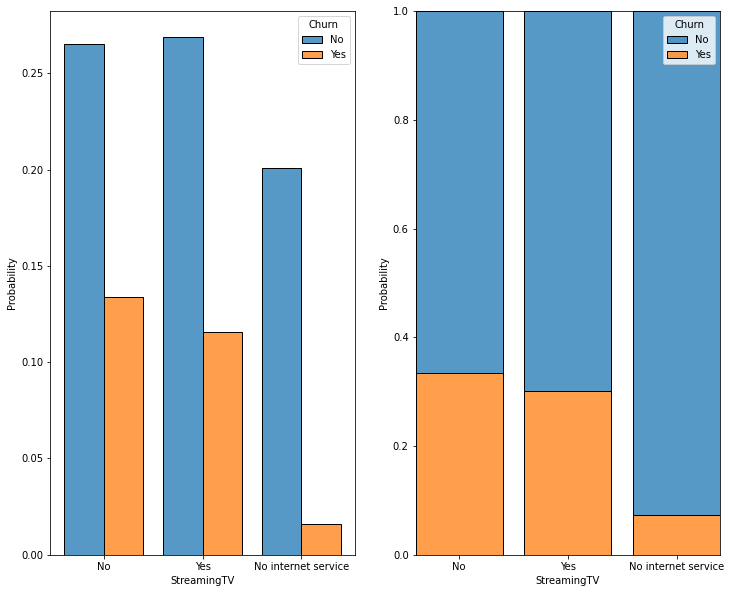

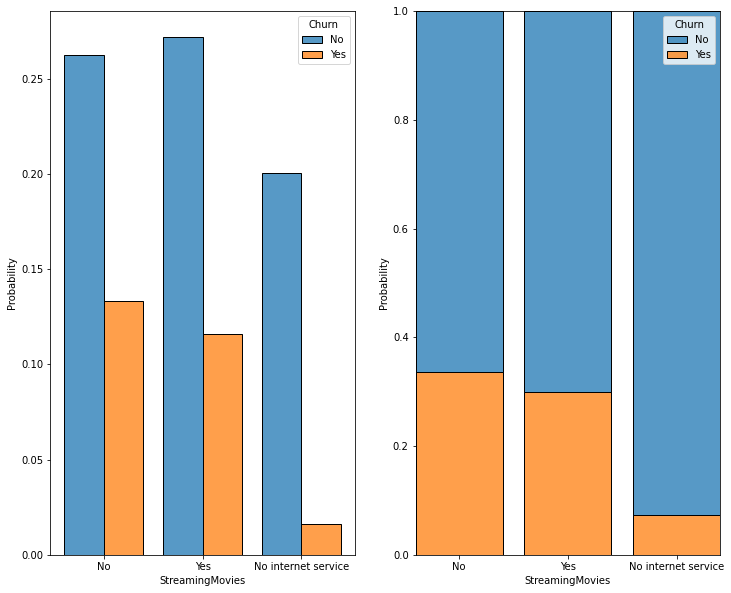

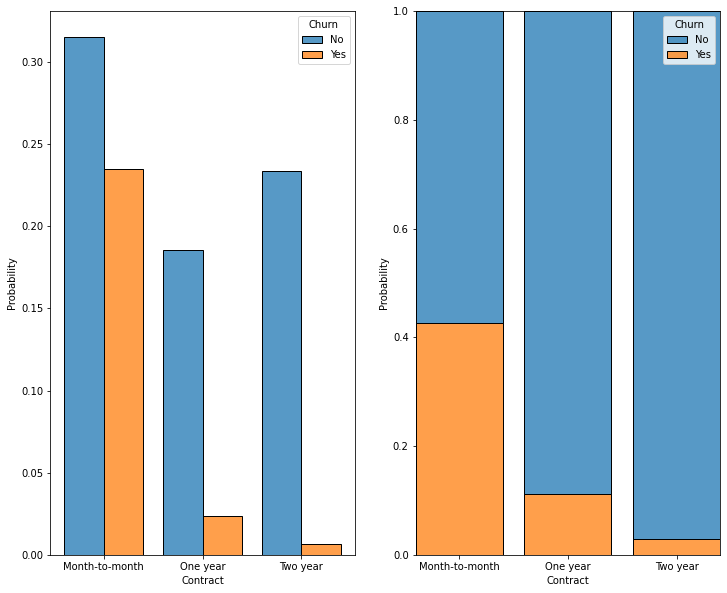

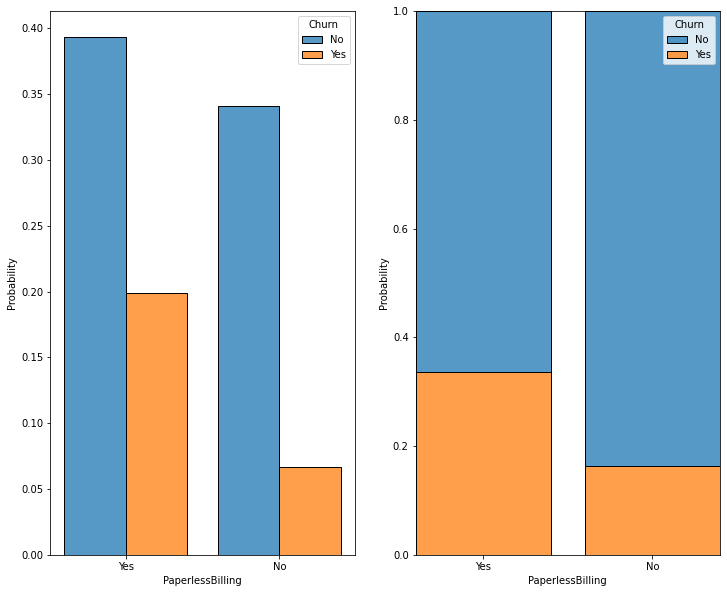

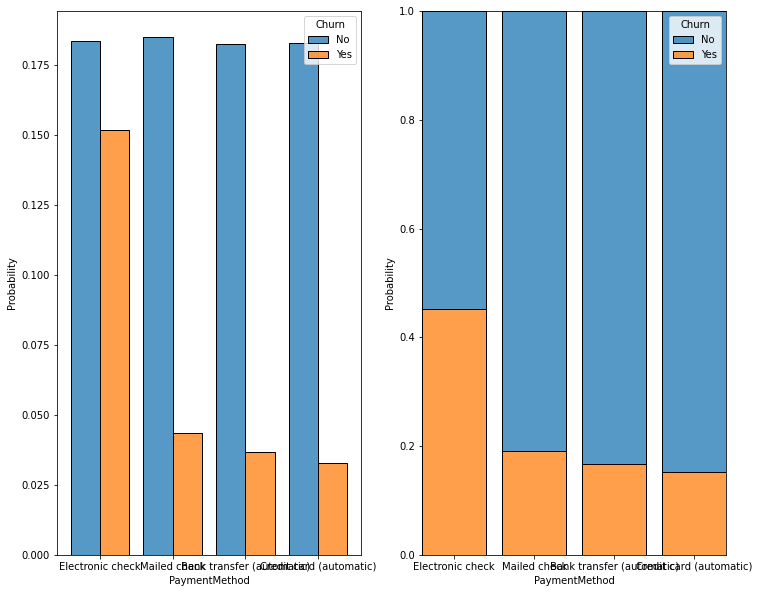

In [ ]:
for col in cat_features:
  fig, ax = plt.subplots(1,2)
  ax1 = sns.histplot(data=df, x=col, hue="Churn", stat="probability", multiple="dodge", shrink=.8, ax=ax[0])
  ax2 = sns.histplot(data=df, x=col, hue="Churn", stat="probability", multiple="fill", shrink=.8, ax=ax[1])
  fig.show()

- no link between churn and gender
- customers without dependents less likely to churn
- customers with fiber optic more likely to churn
- in general customers without internet service less likely to churn
- customers without online security more likely to churn
- customers with online backup more likely to churn
- customers without device protection more likely to churn
- customers without technical support more likely to churn
- customers with one year or two year contrancts less likely to churn
- customers with electronic check more likely to churn

## Preprocessing

In [ ]:
def preprocess_inputs(df, return_X_y=False):
  df = df.copy()

  # Drop columns that give little information
  df = df.drop(['customerID'], axis=1)

  # Transform categorical features into numeric
  df['TotalCharges'] = df['TotalCharges'].replace(' ', np.NaN)
  df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mode()[0]).astype(float)

  # One-hot encode binary categorical features
  for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']:
    dummies = pd.get_dummies(df[col], prefix=col).iloc[:, 0]
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(col, axis=1)
  
  # One-hot encode binary categorical features
  for col in ['MultipleLines', 	'InternetService', 	'OnlineSecurity', 	'OnlineBackup', 	'DeviceProtection', 	'TechSupport', 	'StreamingTV', 	'StreamingMovies', 	'Contract', 	'PaymentMethod']:
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(col, axis=1)
  
  # Split into X and y
  y = df['Churn']
  X = df.drop(['Churn'], axis=1)

  y = y.replace({'Yes': 1, 'No': 0})

  if return_X_y:
    return X, y

  # Train test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
  
  return X_train, X_test, y_train, y_test

In [ ]:
X, y = preprocess_inputs(df, return_X_y=True)
X

,tenure,MonthlyCharges,TotalCharges,gender_Female,SeniorCitizen_0,Partner_No,Dependents_No,PhoneService_No,PaperlessBilling_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,34,56.95,1889.50,0,1,1,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,45,42.30,1840.75,0,1,1,1,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,72,103.20,7362.90,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,11,29.60,346.45,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,4,74.40,306.60,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

## Model building. XGBoost

- Precision, Recall, ROC curve: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
- F1: https://en.wikipedia.org/wiki/F-score
- CM: https://en.wikipedia.org/wiki/Phi_coefficient
- MCC: https://en.wikipedia.org/wiki/Confusion_matrix
- Log loss: https://en.wikipedia.org/wiki/Cross_entropy
- Boosting: XGBoost: https://www.youtube.com/watch?v=TyvYZ26alZs, https://www.youtube.com/watch?v=OtD8wVaFm6E

Instead of aggregating trees, boosted trees learn from erros during each boosting round.

In [ ]:
params={
  "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30,0.5,0.9],
  "max_depth":[2,3,4,5,6,8,10,12,15,30],
  "min_child_weight":[1,3,5,7, 10, 100,120,200],
  "gamma":[0.0,0.1,0.2,0.3,0.4,0.5,0.8,1],
  "colsample_bytree":[0.3,0.4,0.5,0.7]
}

clf = RandomizedSearchCV(
    XGBClassifier(),
    param_distributions=params,
    scoring='neg_log_loss',
    cv=10,
    verbose=3
)

# fitting it
X, y = preprocess_inputs(df, return_X_y=True)
clf.fit(X,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5;, score=-0.464 total time=   0.8s
[CV 2/10] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5;, score=-0.438 total time=   0.8s
[CV 3/10] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5;, score=-0.452 total time=   0.8s
[CV 4/10] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5;, score=-0.434 total time=   0.8s
[CV 5/10] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5;, score=-0.475 total time=   0.8s
[CV 6/10] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5;, score=-0.518 total time=   0.9s
[CV 7/10] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5;, score=-0.465 total time=   0.8s
[CV 8/10] END

RandomizedSearchCV(cv=10, estimator=XGBClassifier(),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                  0.8, 1],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.5, 0.9],
                                        'max_depth': [2, 3, 4, 5, 6, 8, 10, 12,
                                                      15, 30],
                                        'min_child_weight': [1, 3, 5, 7, 10,
                                                             100, 120, 200]},
                   scoring='neg_log_loss', verbose=3)

In [ ]:
clf.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.3,
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 7}

## Final model

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [ ]:
clf.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.3, max_depth=2, min_child_weight=7)

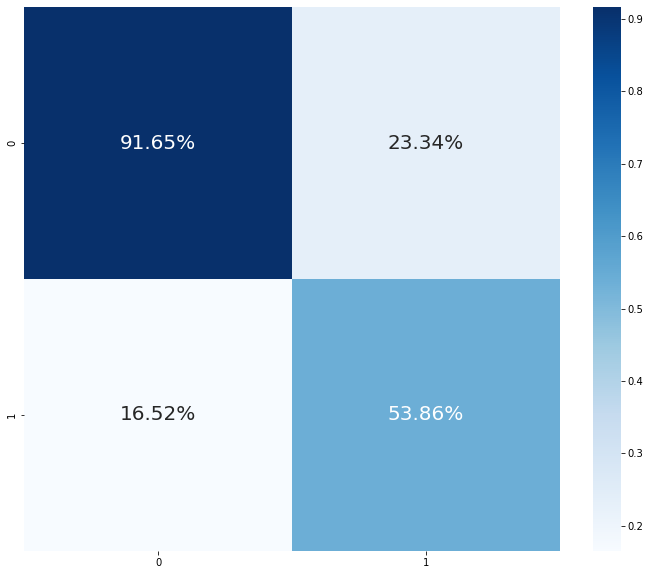

In [ ]:
y_pred = clf.best_estimator_.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix, axis=1), annot=True, fmt='.2%', cmap='Blues', annot_kws={'size':20})

In [ ]:
matthews_corrcoef(y_test, y_pred)

0.4979860933474988

In [ ]:
y_pred_proba = clf.best_estimator_.predict_proba(X_test)

log_loss(y_test, y_pred_proba)

0.38997833029302237